In [ ]:
import argparse
import logging
import time
import sys

import cv2
import numpy as np

from pose.estimator import TfPoseEstimator
from pose.networks import get_graph_path, model_wh

from utils.sort import Sort
from utils.actions import actionPredictor
from utils.joint_preprocess import *
from utils import common

import settings

import matplotlib.pyplot as plt

In [ ]:
# Load NN graph
w, h = model_wh('432x368')
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(w, h))
        
# Estimate human poses from a single image    
image = common.read_imgfile('./p1.jpg', None, None)
if image is None:
    logger.error('Image can not be read, path=%s' % image)
    sys.exit(-1)

In [ ]:
t = time.time()

In [ ]:
humans = e.inference(image)
elapsed = time.time() - t
print(elapsed)

In [ ]:
image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)

In [ ]:
fig = plt.figure()
a = fig.add_subplot(2,2,1)
a.set_title('Result')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [ ]:
bgimg = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB)
bgimg = cv2.resize(bgimg, (e.heatMat.shape[1], e.heatMat.shape[0]), interpolation=cv2.INTER_AREA)

a = fig.add_subplot(2,2,2)
plt.imshow(bgimg, alpha=0.5)
tmp = np.amax(e.heatMat[:, :, :-1], axis=2)
plt.imshow(tmp, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()

In [ ]:
tmp2 = e.pafMat.transpose((2, 0, 1))
tmp2_odd = np.amax(np.absolute(tmp2[::2, :, :]), axis=0)
tmp2_even = np.amax(np.absolute(tmp2[1::2, :, :]), axis=0)

a = fig.add_subplot(2,2,3)
a.set_title('Vectormap-x')
plt.imshow(tmp2_odd, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()

In [ ]:
a = fig.add_subplot(2,2,4)
a.set_title('Vectormap-y')
plt.imshow(tmp2_even, cmap=plt.cm.gray, alpha=0.5)
plt.colorbar()
plt.show()

In [ ]:
# Start over with detailed plotting
sys.modules[__name__].__dict__.clear()

In [1]:
import argparse
import logging
import time
import sys

import cv2
import numpy as np

from pose.estimator import TfPoseEstimator
from pose.networks import get_graph_path, model_wh

from utils.sort import Sort
from utils.actions import actionPredictor
from utils.joint_preprocess import *
from utils import common

import settings

import matplotlib.pyplot as plt

In [2]:
fps_time = 0
image = common.read_imgfile('./p1.jpg', None, None)
estimator = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(432, 368))

In [3]:
type(image)
image.shape

(232, 217, 3)

In [20]:
tracker = Sort(settings.sort_max_age, settings.sort_min_hit)

In [21]:
print('tracker type is: ', type(tracker), '\n')

tracker type is:  <class 'utils.sort.Sort'> 



In [4]:
humans = estimator.inference(image)

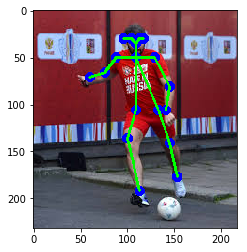

In [5]:
image_sk = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
#cv2.putText(image, "FPS: %f" % (1.0 / (time.time() - fps_time)), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
#cv2.imshow('tf-pose-estimation result', image)
plt.imshow(cv2.cvtColor(image_sk, cv2.COLOR_BGR2RGB))

In [6]:
image_tk, joints, bboxes, xcenter, sk = TfPoseEstimator.get_skeleton(image, humans, imgcopy=False)
height = image_tk.shape[0]
width = image_tk.shape[1]


In [19]:
bboxes = np.array(bboxes)
print('bboxes type is: ', type(bboxes), '\n', 'bboxes dim is: ', bboxes.shape, '\n')

print('joints type is: ', type(joints), '\n')

print('image_tk type is: ', type(image_tk), '\n')

print('xcenter type is: ', type(xcenter), '\n')

print('sk type is: ', type(sk), '\n')


bboxes type is:  <class 'numpy.ndarray'> 
 bboxes dim is:  (1, 5) 

joints type is:  <class 'list'> 

image_tk type is:  <class 'numpy.ndarray'> 

xcenter type is:  <class 'list'> 

sk type is:  <class 'numpy.ndarray'> 

